### Nombre: Gabriel Antonio Edreira García

In [451]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,mean_squared_error ,r2_score
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# KNN

In [452]:
#Leemos el dataset
data_df = pd.read_csv("mafs.csv")

data_df

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,32,10,Washington D.C.,Brandon Reid,34,M,Sales Manager,No,Divorced,1,0,0,0,1,0,0,1
64,33,10,Washington D.C.,Meka Jones,25,F,Category Analyst,No,Divorced,1,0,0,0,1,0,0,1
65,33,10,Washington D.C.,Michael Watson,31,M,Education Director,Yes,Divorced,1,0,0,0,1,0,0,1
66,34,10,Washington D.C.,Mindy Shiben,34,F,Figure Skating Coach,No,Divorced,1,0,0,0,1,0,0,1


In [453]:
data_df['Gender'] = data_df.Gender.apply(lambda x: 1 if (x == 'M') else 0)
data_df['Location'] = data_df.Location.apply(lambda x: 1 if (len(x.split('and')) == 1) else 0) # Controlamos los que viven en la misma ciudad
data_df['Decision'] = data_df.Decision.apply(lambda x: 1 if (x == 'Yes') else 0)
data_df['Status'] = data_df.Status.apply(lambda x: 1 if (x == 'Married') else 0)

X_normal  = data_df[["Couple", "Season", "Age", "Gender","Decision", "Status", "DrLoganLevkoff", "DrJosephCilona", "ChaplainGregEpstein","PastorCalvinRoberson", "RachelDeAlto", "DrJessicaGriffin", "DrVivianaColes"]]

y_normal = data_df['Status']
# y_normal
# X_normal

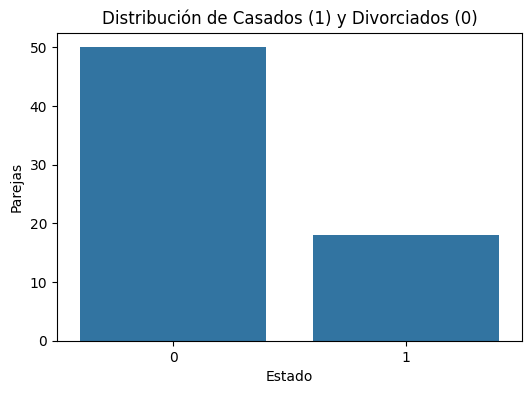

In [454]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=data_df)

plt.title('Distribución de Casados (1) y Divorciados (0)')
plt.xlabel('Estado')
plt.ylabel('Parejas')

plt.show()

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.2, random_state=0)

In [456]:
 #Primero lo haremos con knn y un número fijo de vecinos, por ejemplo 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5714285714285714

In [457]:
# Definición del modelo KNN con TODAS LAS VARIABLES
knn = KNeighborsClassifier()

param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Utilizando el RandomSearch para encontrar el mejor número de vecinos
random_search_knn = RandomizedSearchCV(knn, param_distributions, n_iter=44, cv=5, random_state=0)
random_search_knn.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search_knn.best_params_)

Mejores hiperparámetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 6}


In [458]:
random_search_knn.score(X_test, y_test) 

0.7857142857142857

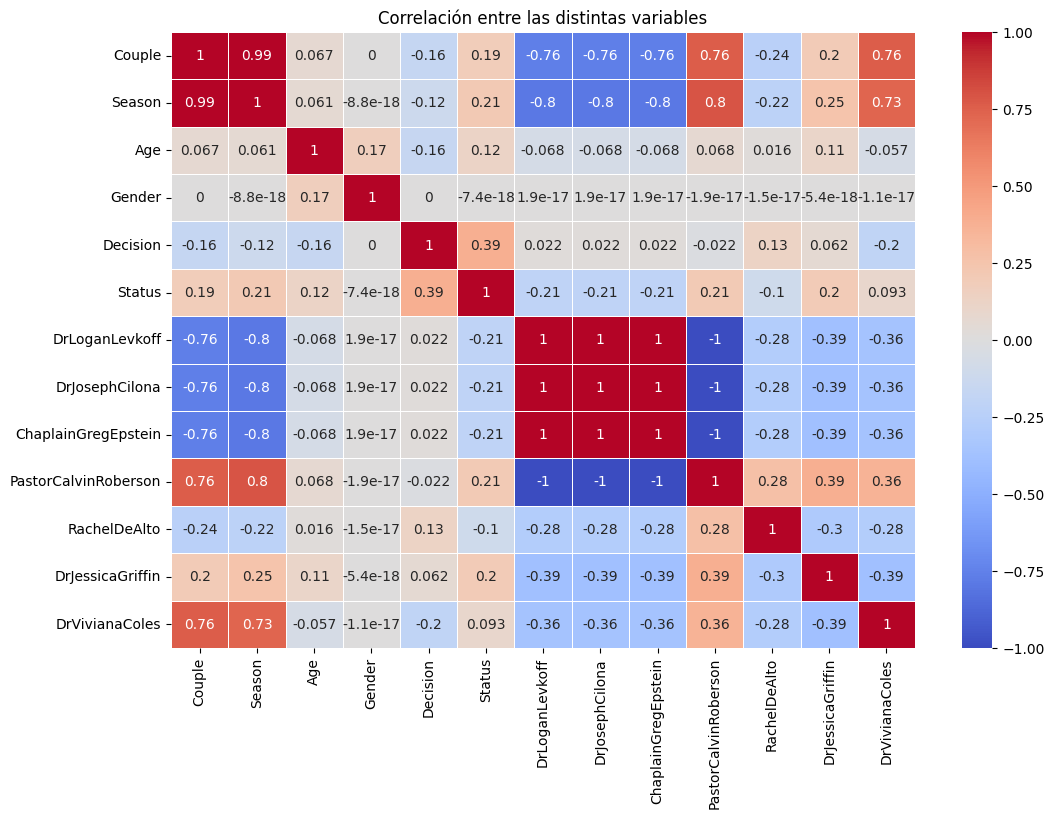

In [459]:
plt.figure(figsize=(12,8))
plt.title("Correlación entre las distintas variables")
sns.heatmap(X_normal.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

In [460]:

X_trainRandom, X_testRandom, y_trainRandom, y_testRandom = train_test_split(X_normal, y_normal, test_size=0.4, random_state=0)


knn = KNeighborsClassifier()

# Distribución de hiperparámetros a explorar
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Random Search
random_search_knn = RandomizedSearchCV(knn, param_distributions, n_iter=44, cv=5, random_state=0)
random_search_knn.fit(X_trainRandom, y_trainRandom)

print("Mejores hiperparámetros random search:", random_search_knn.best_params_)

random_search_knn.score(X_testRandom, y_testRandom) 

prediccionesRandom = random_search_knn.predict(X_testRandom)

accuracyRandom = accuracy_score(y_testRandom, prediccionesRandom)

print(f'Precisión del clasificador k-NN con random search y con las clases seleccionadas: {accuracyRandom:.3f}')
mse_random = mean_squared_error(y_testRandom, prediccionesRandom)
r2_lineal = r2_score(y_testRandom,prediccionesRandom)

print(f"KNN fallo cuadrático - MSE: {mse_random:.3f}")
print(f"KNN- R²: {r2_lineal:.3f}")

Mejores hiperparámetros random search: {'weights': 'uniform', 'p': 1, 'n_neighbors': 1}
Precisión del clasificador k-NN con random search y con las clases seleccionadas: 0.679
KNN fallo cuadrático - MSE: 0.321
KNN- R²: -0.400


In [461]:
X_trainGrid, X_testGrid, y_trainGrid, y_testGrid = train_test_split(X_normal, y_normal, test_size=0.4, random_state=0)


knn = KNeighborsClassifier()

# Distribución de hiperparámetros a explorar
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

#Grid Search
grid_search_knn =  GridSearchCV(knn, param_distributions, cv=3)
grid_search_knn.fit(X_trainGrid, y_trainGrid)

print("Mejor hiperparámetros grid search:", grid_search_knn.best_params_)

grid_search_knn.score(X_testGrid, y_testGrid) 

prediccionesGrid = grid_search_knn.predict(X_testGrid)

accuracyGrid = accuracy_score(y_testGrid, prediccionesGrid)

print(f'Precisión del clasificador k-NN con grid search y con las clases seleccionadas: {accuracyGrid:.3f}')
mse_random = mean_squared_error(y_testGrid, prediccionesGrid)
r2_lineal = r2_score(y_testGrid,prediccionesGrid) 

print(f"KNN fallo cuadrático - MSE: {mse_random:.3f}")
print(f"KNN- R²: {r2_lineal:.3f}")

Mejor hiperparámetros grid search: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Precisión del clasificador k-NN con grid search y con las clases seleccionadas: 0.679
KNN fallo cuadrático - MSE: 0.321
KNN- R²: -0.400


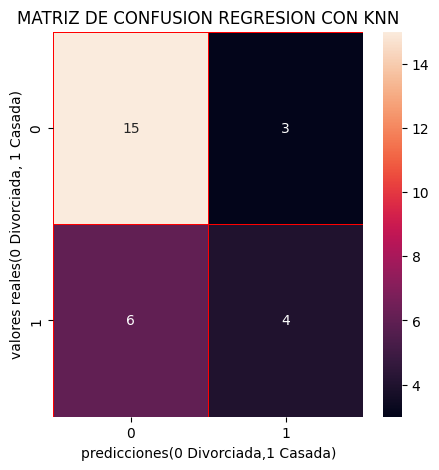

In [462]:
cm = confusion_matrix(y_testGrid, prediccionesGrid) 

f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones(0 Divorciada,1 Casada)")
plt.ylabel("valores reales(0 Divorciada, 1 Casada)")
plt.title("MATRIZ DE CONFUSION REGRESION CON KNN")
plt.show()

In [463]:
print("Las estadísticas son: ")
print(classification_report(y_testGrid, prediccionesGrid))

Las estadísticas son: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.57      0.40      0.47        10

    accuracy                           0.68        28
   macro avg       0.64      0.62      0.62        28
weighted avg       0.66      0.68      0.66        28



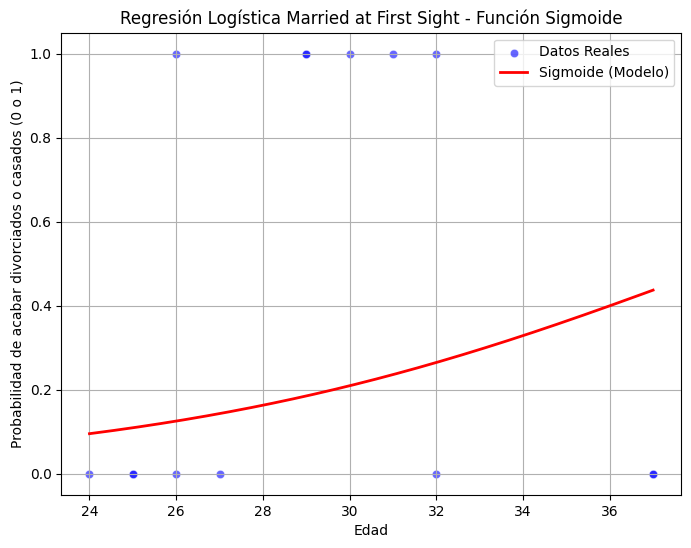

In [464]:
x_puntos= data_df[["Age"]]
y_puntos= data_df["Status"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_puntos, y_puntos, test_size=0.2, random_state=0)

# Crear el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
prediccionLogical=modelo.predict(X_test)
# Crear un rango para la predicción de la curva sigmoide
X_range = np.linspace(x_puntos.min().values[0], x_puntos.max().values[0], 300).reshape(-1, 1)

# Convertir el rango a DataFrame con el nombre de la columna correcto
X_range_df = pd.DataFrame(X_range, columns=["Age"])

# Predecir las probabilidades usando el DataFrame
y_prob = modelo.predict_proba(X_range_df)[:, 1]

# Graficar los puntos reales y la curva sigmoide
plt.figure(figsize=(8,6))

# Puntos reales del dataset
sns.scatterplot(x=X_test['Age'], y=y_test, color='blue', label="Datos Reales", alpha=0.6)

# Curva sigmoide predicha por el modelo
plt.plot(X_range, y_prob, color='red', linewidth=2, label="Sigmoide (Modelo)")

# Etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Probabilidad de acabar divorciados o casados (0 o 1)")
plt.title("Regresión Logística Married at First Sight - Función Sigmoide")
plt.legend()
plt.grid(True)
plt.show()


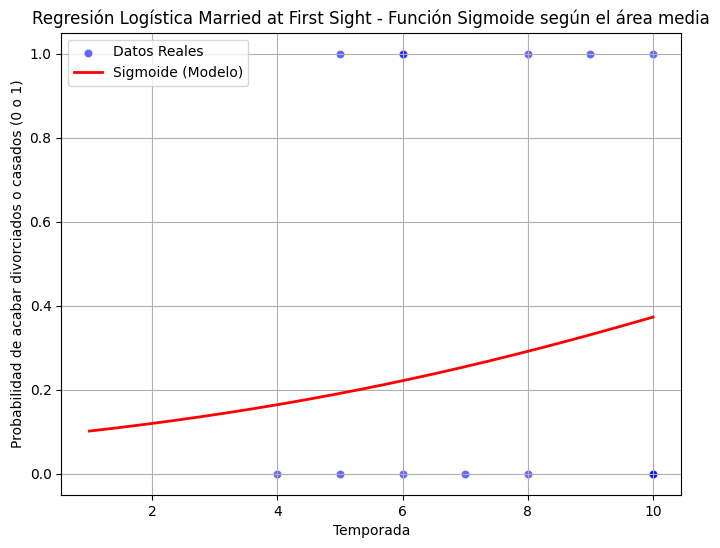

In [465]:
x_media_puntos=data_df[["Season"]]
y_media_puntos=data_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(x_media_puntos, y_media_puntos, test_size=0.2, random_state=0)

# Asumimos que ya tienes el modelo entrenado
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
prediccionLogical=modelo.predict(X_test)
# Crear X_range correctamente como DataFrame con una sola columna 'area_media'
X_range = pd.DataFrame(np.linspace(X_train['Season'].min(), X_train['Season'].max(), 300).reshape(-1, 1), columns=['Season'])

# Ahora puedes hacer la predicción de las probabilidades
y_prob = modelo.predict_proba(X_range)[:, 1]  # Probabilidad de cáncer benigno o maligno

# Graficar los puntos reales y la curva sigmoide
plt.figure(figsize=(8,6))

# Puntos reales del dataset
sns.scatterplot(x=X_test['Season'], y=y_test, color='blue', label="Datos Reales", alpha=0.6)

# Curva sigmoide predicha por el modelo
plt.plot(X_range, y_prob, color='red', linewidth=2, label="Sigmoide (Modelo)")

# Etiquetas y título
plt.xlabel("Temporada")
plt.ylabel("Probabilidad de acabar divorciados o casados (0 o 1)")
plt.title("Regresión Logística Married at First Sight - Función Sigmoide según el área media")
plt.legend()
plt.grid(True)
plt.show()

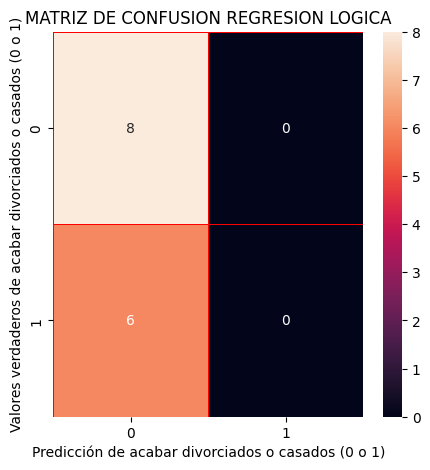

In [466]:
cm= confusion_matrix(y_test,prediccionLogical) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicción de acabar divorciados o casados (0 o 1)")
plt.ylabel("Valores verdaderos de acabar divorciados o casados (0 o 1)")
plt.title("MATRIZ DE CONFUSION REGRESION LOGICA")
plt.show()

In [467]:
print(classification_report(y_test,prediccionLogical))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.00      0.00      0.00         6

    accuracy                           0.57        14
   macro avg       0.29      0.50      0.36        14
weighted avg       0.33      0.57      0.42        14



c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

# SGD

In [468]:
X = data_df[["Couple", "Season", "Age", "Gender","Decision", "Status", "DrLoganLevkoff", "DrJosephCilona", "ChaplainGregEpstein","PastorCalvinRoberson", "RachelDeAlto", "DrJessicaGriffin", "DrVivianaColes"]]
y = data_df["Status"]

X_SGD_train, X_SGD_test, y_SGD_train, y_SGD_test = train_test_split(X, y, test_size=0.3, random_state=0)

escalado=StandardScaler()
escalado.fit(X_SGD_train)
X_train=escalado.transform(X_SGD_train)
X_test=escalado.transform(X_SGD_test)


sgd_regressor = SGDRegressor(max_iter=1000, alpha=0.0001, learning_rate='invscaling', random_state=0)
sgd_regressor.fit(X_SGD_train, y_SGD_train)

SGDRegressor(random_state=0)

In [469]:
y_SGD_pred = sgd_regressor.predict(X_SGD_test)

mse = mean_squared_error(y_SGD_test,y_SGD_pred)
r2 = r2_score(y_SGD_test,y_SGD_pred)

print(f"Regresión Lineal - MSE: {mse:.2f}")
print(f"Regresión Lineal - R²: {r2:.2f}")

Regresión Lineal - MSE: 9930138211453182672896.00
Regresión Lineal - R²: -44685621951539349291008.00


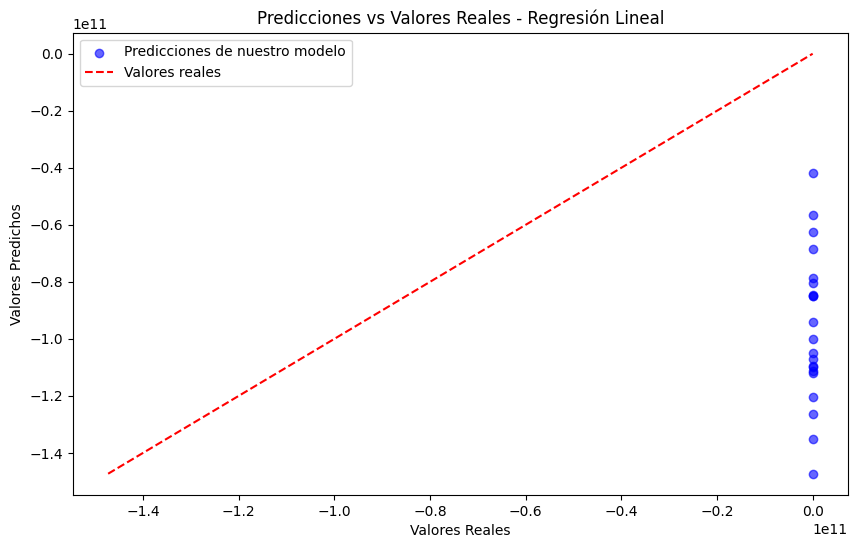

In [470]:
plt.figure(figsize=(10, 6))
plt.scatter(y_SGD_test, y_SGD_pred, color='blue', alpha=0.6, label='Predicciones de nuestro modelo')
limites = np.array([min(y_SGD_test.min(), y_SGD_pred.min()), max(y_SGD_test.max(), y_SGD_pred.max())])
plt.plot(limites, limites, color='red', linestyle='--', label='Valores reales')
plt.title('Predicciones vs Valores Reales - Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

# Naive Bayes


In [471]:
X=data_df[["Couple", "Season", "Age", "Gender","Decision", "Status", "DrLoganLevkoff", "DrJosephCilona", "ChaplainGregEpstein","PastorCalvinRoberson", "RachelDeAlto", "DrJessicaGriffin", "DrVivianaColes"]]
y=data_df["Status"]

scaler = StandardScaler()

X = scaler.fit_transform(X)
X_NB_train,X_NB_test,y_NB_train, y_NB_test=train_test_split(X,y,test_size=0.4)

In [472]:
entrenador=GaussianNB()
entrenador.fit(X_NB_train,y_NB_train)

GaussianNB()

In [473]:
y_NB_predicciones=entrenador.predict(X_NB_test)
report=classification_report(y_NB_test, y_NB_predicciones)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.78      0.88         9

    accuracy                           0.93        28
   macro avg       0.95      0.89      0.91        28
weighted avg       0.94      0.93      0.93        28



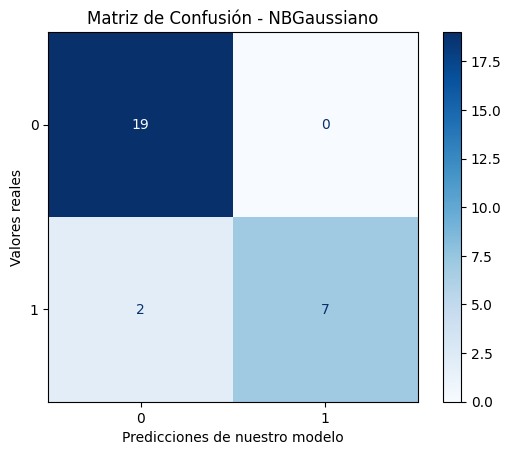

In [474]:
#Por último, vamos a hacer la matriz de confusión para mostrar los resultados de nuestra predicción.
cm = confusion_matrix(y_NB_test, y_NB_predicciones)#Utilizamos, como siempre, el test y las predicciones hechas a través del X_test
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - NBGaussiano")
plt.xlabel("Predicciones de nuestro modelo")
plt.ylabel("Valores reales")
plt.show()